### Homework 2 - Part 2 - Task 2: GMM and PCA
Gaussian Mixture Model(GMM) and PCA <br>
We will use face image dataset to build GMM model to generate new face images <br>
GMM is very slow for high dimentional data <br>
To speed-up GMM, we will apply PCA to the input images. <br>
image samples => forward PCA => samples in a lower-dimensional space => GMM <br>
GMM => random sampling => new samples in a lower-dimensional space => inverse PCA => new images <br>
This is a guided-task: <br>
You will see the output of a code cell and then figure out the code in that cell. <br>
In each code cell, there are instructions to help you. <br>
This is a very efficient and effective way to learn how to program with sk-learn <br>
see GMM_DE_Generative_Model.ipynb

In [101]:
%matplotlib inline
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
sn.set(style='whitegrid')
from sklearn.mixture import GaussianMixture as GMM
from matplotlib.patches import Ellipse

Load image data

In [102]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=500)
print(faces.target_names)
print(faces.images.shape)

['George W Bush']
(530, 62, 47)


check the total number of samples/images, `N`

In [103]:
#what is N ?
N=faces.images.shape[0]
N

530

check the input dimension (the number of elements in each input sample), `M`

In [104]:
#what is M?
M=faces.images.shape[1]*faces.images.shape[2]
M

2914

Next let's plot the first 100 of these to recall exactly what we're looking at:

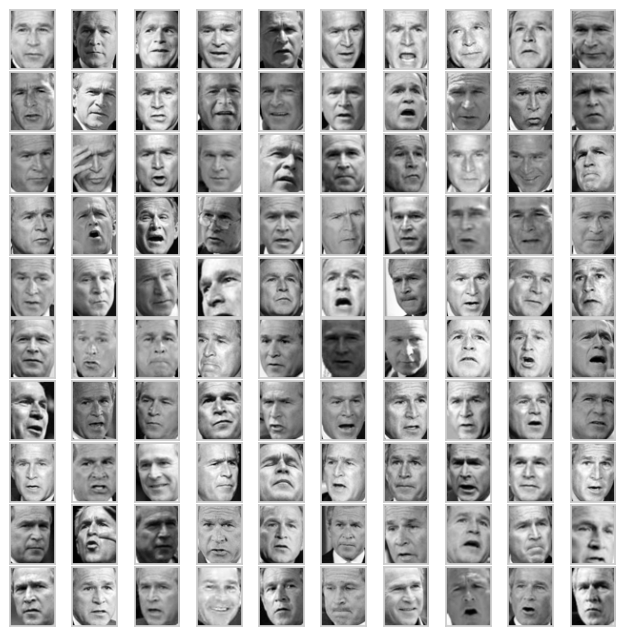

In [105]:
def plot_faces(data):
    fig, ax = plt.subplots(10, 10, figsize=(8, 8),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i], cmap='gray')
plot_faces(faces.images)

We have N images, and each image has M pixels <br>
N = 530  <  M = 2914 <br>
the number of samples is smaller than the dimension <br>
We will use dimension reduction to reduce the number of features

In [106]:
# apply PCA to images
# you may need this: images.reshape(N,-1)
# set PCA parameter n_components to 120
# set whiten=True to use the normalized features
# assume data = pca.fit_transform(...)

from sklearn.decomposition import PCA
pca = PCA(n_components=120, whiten=True)
data = pca.fit_transform(faces.images.reshape(N,-1))

In [107]:
#check the shape of data
data.shape

(530, 120)

In [108]:
#check the value of cumulative explained variance ratio using "n_components" eigenvectors/eigenvalues
#i.e., the percentage of the variance that is explained using "n_components" eigenvectors/eigenvalues
#"n_components" of PCA is defined in one of the above cells

np.max(np.cumsum(pca.explained_variance_ratio_))

0.94589776

Afer PCA transform, the number of features is changed from 2914 (62*47) to 120 <br>
N = 530,  data.shape[1] = 120 <br>
Now, we fit many GMM to `data` with different number of components <br>
We will select the best one based on AIC

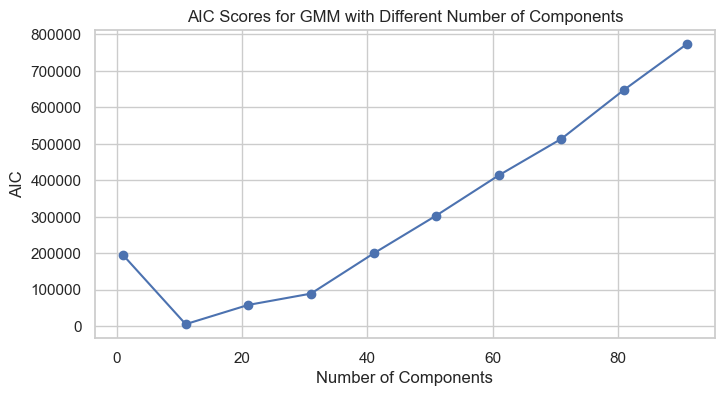

In [109]:
#fit GMM with n_components in the range of 1 to 100 with step 10
from sklearn.mixture import GaussianMixture
n_components_range = range(1, 101, 10)

aic_scores = []
for n in n_components_range:
    # Fit a Gaussian Mixture Model with the current number of components
    gmm = GaussianMixture(n_components=n, covariance_type='full', random_state=0)
    gmm.fit(data)
    
    # Compute the AIC score for the current model
    aic = gmm.aic(data)
    aic_scores.append(aic)

# Plot the AIC scores to see which model might be best
plt.figure(figsize=(8, 4))
plt.plot(list(n_components_range), aic_scores, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("AIC")
plt.title("AIC Scores for GMM with Different Number of Components")
plt.show()

Overall, the curve keeps going up: something is weird. <br>
What will the curve be if we have more data to train GMM ? <br>
note: you may get a different curve due to some randomness in initialization.

It looks like when n_components= ?? AIC reaches the minimum. <br>
Let's fit the GMM with n_components=?? (when AIC is minimum), and check if gmm is converged or not 

In [110]:
# write code to find the best n_components
best_n = n_components_range[np.argmin(aic_scores)]
print("Best n_components based on minimum AIC:", best_n)

# fit GMM using the best n_components
best_gmm = GaussianMixture(n_components=best_n, covariance_type='full', random_state=0)
best_gmm.fit(data)
#---------
print(gmm.converged_)

Best n_components based on minimum AIC: 11
True


Draw 100 new samples from GMM (gmm) <br>
The new data samples are in the 120-dimensional projected space

In [111]:
#write code to generate data_new from gmm
data_new, _ = gmm.sample(100)
#then check the shape
data_new.shape

(100, 120)

Finally, we can transform the 100 samples back to the original space (pca inverse) <br>
and plot some of the images in the original space <br>

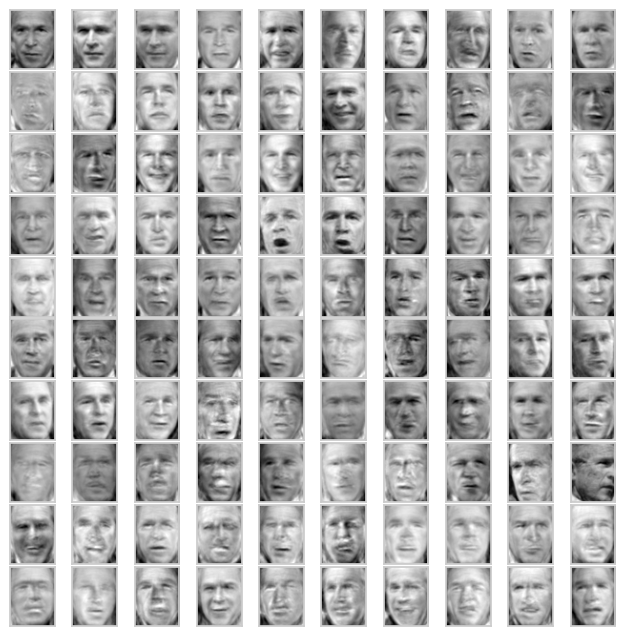

In [112]:
# write code to obtain faces_new by applying inverse pca on data_new
faces_new = pca.inverse_transform(data_new)

# show the new images
plot_faces(faces_new.reshape(-1,62, 47))

### Let's repeat the above process using more data

In [113]:
#do not change the code in this cell
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=50)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Jacques Chirac' 'Jean Chretien'
 'John Ashcroft' 'Junichiro Koizumi' 'Serena Williams' 'Tony Blair']
(1560, 62, 47)


In [114]:
#check the number of images
N = faces.images.shape[0]
N

1560

In [115]:
#check the input dimension (the number of elements in each input sample)
M = faces.images.shape[1] * faces.images.shape[2]
M

2914

We have N images, and each iamge has M pixels  <br>
N = 1560 and M = 2914 : N < M  <br>
We will use dimension reduction to reduce the number of features from 2914 to 120 <br>

In [116]:
# apply PCA to images
# set PCA parameter n_components to 120
# assume data = pca.fit_transform(...)

from sklearn.decomposition import PCA
pca = PCA(n_components=120, whiten=True)
data = pca.fit_transform(faces.images.reshape(N, -1))


In [117]:
#check the shape of data
data.shape


(1560, 120)

In [118]:
#check the value of cumulative explained variance ratio
np.max(np.cumsum(pca.explained_variance_ratio_))

0.9185631

Now, we fit many GMMs to the transformed `data` with different number of components   <br>
We will select the best one based on AIC

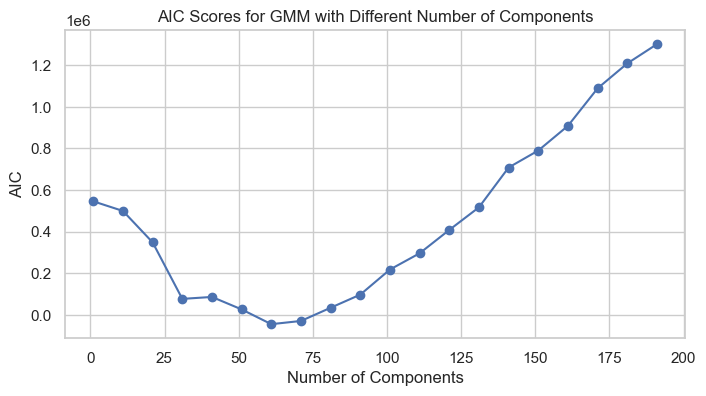

In [119]:
#fit GMM with n_components in the range of 1 to 200 with the step of 10

n_components_range = range(1, 201, 10)

aic_scores = []
for n in n_components_range:
    # Fit a Gaussian Mixture Model with the current number of components
    gmm = GaussianMixture(n_components=n, covariance_type='full', random_state=0)
    gmm.fit(data)
    
    # Compute the AIC score for the current model
    aic = gmm.aic(data)
    aic_scores.append(aic)

# Plot the AIC scores to see which model might be best
plt.figure(figsize=(8, 4))
plt.plot(list(n_components_range), aic_scores, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("AIC")
plt.title("AIC Scores for GMM with Different Number of Components")
plt.show()

Now, we have a U-haped curve, nice. (again, you may get a different curve) <br>
It appears that AIC is miminized around 60 components. <br>
What is the exact value of n_components when AIC is minimum?

In [120]:
#write code to find out the exact value of n_components when AIC is minimum
#you may get a different number due to randomness in GMM
best_n = n_components_range[np.argmin(aic_scores)]
print("Best n_components based on minimum AIC:", best_n)

Best n_components based on minimum AIC: 61


Let's quickly fit GMM with n_components=?? (when AIC is minimum) to the `data` and confirm that it has converged:

In [121]:
# fit the GMM with n_components = the value when AIC is minimum
best_gmm = GaussianMixture(n_components=best_n, covariance_type='full', random_state=0)
best_gmm.fit(data)
print(gmm.converged_)

True


Generate 100 new samples from this GMM

In [122]:
#write code to generate data_new from gmm
data_new, _ = gmm.sample(100)

#then check the shape
data_new.shape

(100, 120)

Transform the 100 new samples back to the original space

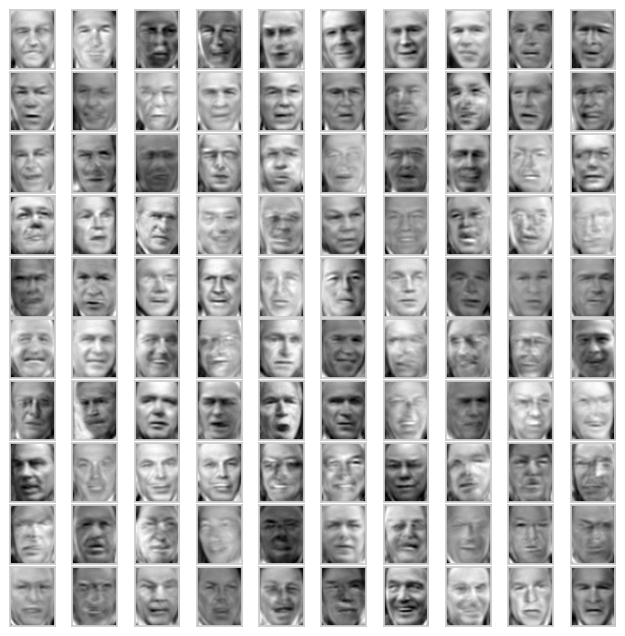

In [123]:
# write code to obtain faces_new by apply inverse pca on data_new
faces_new = pca.inverse_transform(data_new)
# show the new images
plot_faces(faces_new.reshape(-1,62, 47))

GMM is good but very time consuming. PCA+GMM is a good approach to reduce time cost.